In [17]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
import time

mydir='D:\\HighEnergyAstro\\SHAO, Wenbiao H\\radiativeDephasing\\'

tottime=50000
massratio=1e-4
THETA=np.pi/4
PHI=0
R_pc=5e9
M=2e5

In [18]:
## KRZ wave

#计算能量etc
#赤道面 非Kerr 轨道
p=6;
ecc=0.5
d1=0.2; d2=0;d3=0;
spin=0.5;M=2e5

rmax = p / (1 - ecc);
rmin = p / (1 + ecc);
r0 = rmax;
th0=np.pi/2.0
invgmax=metric_KRZ_inverse(spin, d1, rmax, th0);
invgmin=metric_KRZ_inverse(spin, d1, rmin, th0);


EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / (invgmax[0][0] - invgmin[0][0]);
Lz = sqrt((invgmax[3][0] - invgmin[3][0]) / (EoverL*EoverL*(invgmin[3][0] * invgmax[0][0] - invgmax[3][0] * invgmin[0][0]) + (invgmin[3][0] * invgmax[3][3] - invgmax[3][0] * invgmin[3][3])));

E = EoverL*Lz;
iota=0;Q=0;
print(E,Lz)
print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;tottime=%f; massratio=%.10e;'%(M,d1,spin,p,ecc,iota,E,Lz,Q,tottime,massratio))
print('R_pc=%.10e; THETA=%.10e; PHI=%.10e;'%(R_pc,THETA,PHI))

0.943852118061 3.04312647962
M=200000.000000; krz_d[1]= 0.200000; spin = 0.500000;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9438521181;Lz=3.0431264796; Q=0.0000000000;tottime=50000.000000; massratio=1.0000000000e-04;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;


In [23]:
orbfilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)

In [24]:
#reading
t_sec,wave_p,wave_c=np.loadtxt(wavefilename1,unpack=True)
index, myt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename1,unpack=True)

In [25]:
if wave_p[0]==0:
    [t_sec,wave]=getwave(orbfilename1,M=M)
    wave_p=np.real(wave)

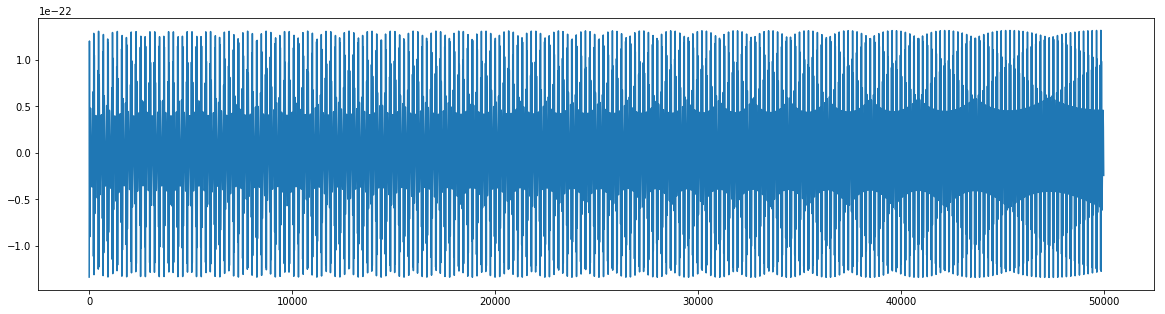

In [26]:
#plotting KRZ wave
fig=plt.figure()
plt.plot(t_sec,wave_p)
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
#plt.xlim(0,2e3)

In [27]:
## getting Kerr wave

# Corresponding confusion M and a

M_kerr=201020.11500944689
a_kerr=0.61749075872024983

[Ekerr,Lzkerr,Q]=getELQ(ecc,p,iota,a_kerr)
d1=0;d2=0;d3=0;
print('M= %f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(M_kerr,0,a_kerr,p,ecc,iota,Ekerr,Lzkerr,Q))

M= 201020.115009; krz_d[1]= 0.000000; spin = 0.617491;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9437566013;Lz=3.0362859229; Q=0.0000000000;


In [28]:
orbfilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)

In [42]:
#reading Kerr
t_sec2,wave_p2,wave_c2=np.loadtxt(wavefilename2,unpack=True)
index, myt_sec, tau,t2,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename2,unpack=True)

In [43]:
if wave_p2[0]==0:
    [t_sec2,wave2]=getwave(orbfilename2,M=M_kerr)
    wave_p2=np.real(wave2)

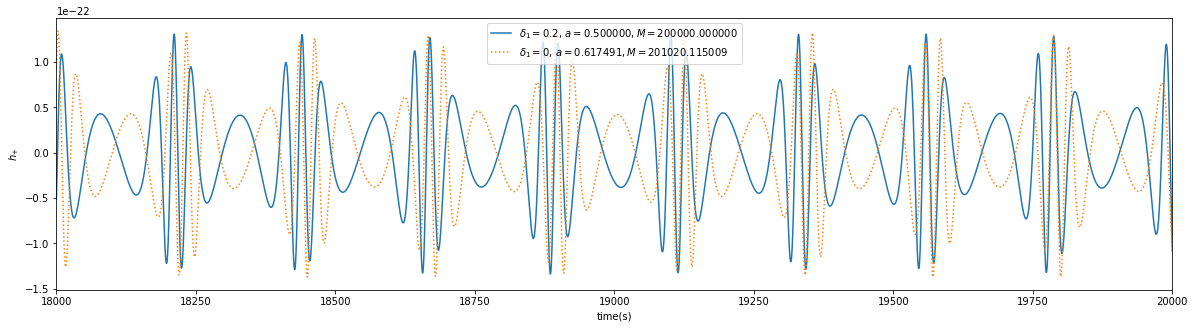

In [44]:
#comparing wave
fig=plt.figure()
plt.plot(t_sec,wave_p,label='$\delta_1=0.2,\, a=%f, M=%f$'%(spin,M))
plt.plot(t_sec2,wave_p2,':',label='$\delta_1=0,\, a=%f, M=%f$'%(a_kerr,M_kerr))
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
plt.xlim(18e3,20e3)
plt.xlabel('time(s)')
plt.ylabel('$h_\plus$')
plt.legend()
plt.savefig(mydir+'Evo_2D_ma_%d.pdf'%time.time())

In [45]:
tottimelist=np.arange(500,50000,500)
olplist=[]
for tottime in tottimelist:
    olplist.append(overlap([t_sec[np.where(t_sec<tottime)],wave_p[np.where(t_sec<tottime)]+1j*wave_c[np.where(t_sec<tottime)]],
        [t_sec2[np.where(t_sec<tottime)],wave_p2[np.where(t_sec<tottime)]+1j*wave_c2[np.where(t_sec<tottime)]]))

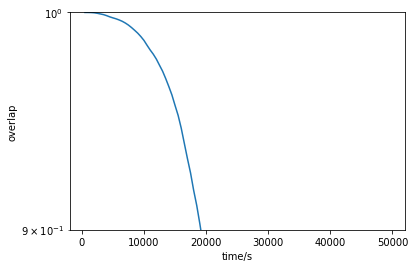

In [47]:
plt.semilogy(tottimelist,olplist)
plt.xlabel('time/s')
plt.ylabel('overlap')
plt.ylim(0.9,1.0)
plt.savefig(mydir+'olp_2D_ma_%d.pdf'%time.time())

In [126]:
#算更多的overlap-time
tottime=70000
massratio=1e-5
THETA=np.pi/4
PHI=0
R_pc=5e9
M=2e5

In [127]:
## KRZ wave

#计算能量etc
#赤道面 非Kerr 轨道
p=6;
ecc=0.5
d1=0.2; d2=0;d3=0;
spin=0.5

rmax = p / (1 - ecc);
rmin = p / (1 + ecc);
r0 = rmax;
th0=np.pi/2.0
invgmax=metric_KRZ_inverse(spin, d1, rmax, th0);
invgmin=metric_KRZ_inverse(spin, d1, rmin, th0);


EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / (invgmax[0][0] - invgmin[0][0]);
Lz = sqrt((invgmax[3][0] - invgmin[3][0]) / (EoverL*EoverL*(invgmin[3][0] * invgmax[0][0] - invgmax[3][0] * invgmin[0][0]) + (invgmin[3][0] * invgmax[3][3] - invgmax[3][0] * invgmin[3][3])));

E = EoverL*Lz;
iota=0;Q=0;
print(E,Lz)
print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;tottime=%f; massratio=%.10e;'%(M,d1,spin,p,ecc,iota,E,Lz,Q,tottime,massratio))
print('R_pc=%.10e; THETA=%.10e; PHI=%.10e;'%(R_pc,THETA,PHI))

0.943852118061 3.04312647962
M=200000.000000; krz_d[1]= 0.200000; spin = 0.500000;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9438521181;Lz=3.0431264796; Q=0.0000000000;tottime=70000.000000; massratio=1.0000000000e-05;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;


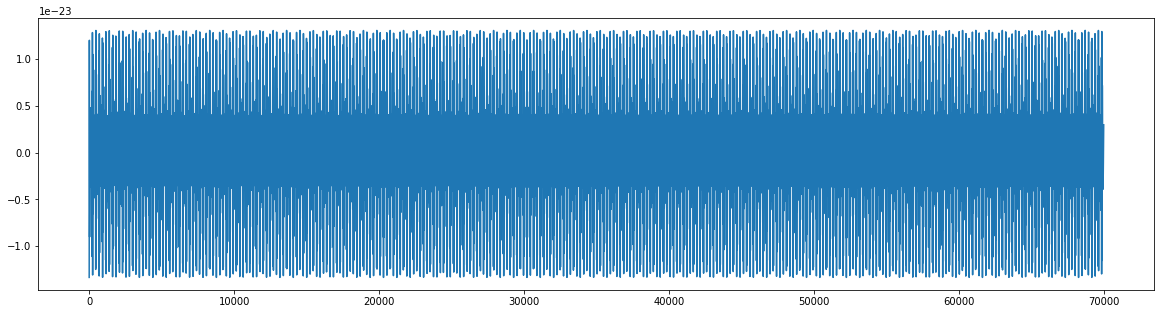

In [128]:
orbfilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)

#reading
t_sec,wave_p,wave_c=np.loadtxt(wavefilename1,unpack=True)
index, myt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename1,unpack=True)

if wave_p[0]==0:
    [t_sec,wave]=getwave(orbfilename1,M=M)
    wave_p=np.real(wave)
    
#plotting KRZ wave
fig=plt.figure()
plt.plot(t_sec,wave_p)
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
#plt.xlim(0,2e3)

In [129]:
## getting Kerr wave

# Corresponding confusion M and a

M_kerr=201020.11500944689
a_kerr=0.61749075872024983

[Ekerr,Lzkerr,Q]=getELQ(ecc,p,iota,a_kerr)
d1=0;d2=0;d3=0;
print('M= %f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(M_kerr,0,a_kerr,p,ecc,iota,Ekerr,Lzkerr,Q))

M= 201020.115009; krz_d[1]= 0.000000; spin = 0.617491;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9437566013;Lz=3.0362859229; Q=0.0000000000;


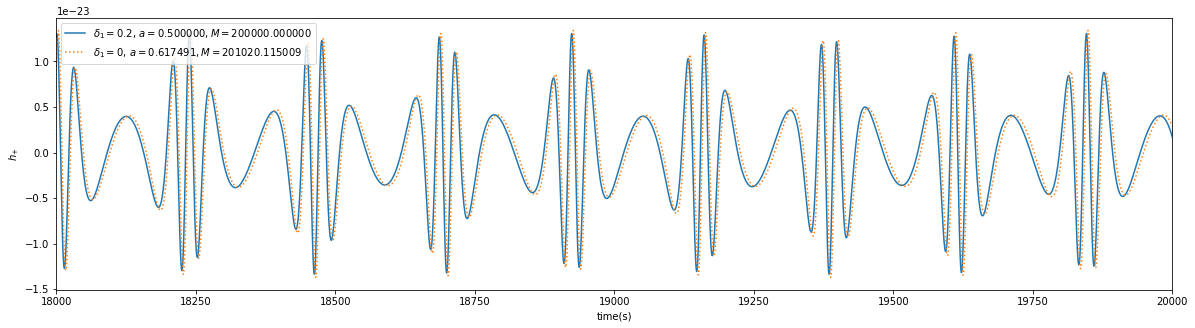

In [130]:
orbfilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
    
#reading Kerr
t_sec2,wave_p2,wave_c2=np.loadtxt(wavefilename2,unpack=True)
index, myt_sec, tau,t2,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename2,unpack=True)

if wave_p2[0]==0:
    [t_sec2,wave2]=getwave(orbfilename2,M=M_kerr)
    wave_p2=np.real(wave2)
    
#comparing wave
fig=plt.figure()
plt.plot(t_sec,wave_p,label='$\delta_1=0.2,\, a=%f, M=%f$'%(spin,M))
plt.plot(t_sec2,wave_p2,':',label='$\delta_1=0,\, a=%f, M=%f$'%(a_kerr,M_kerr))
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
plt.xlim(18e3,20e3)
plt.xlabel('time(s)')
plt.ylabel('$h_\plus$')
plt.legend()
plt.savefig(mydir+'Evo_2D_ma_%d.pdf'%time.time())

In [131]:
tottimelist2=np.arange(500,70000,500)
olplist2=[]
for tottime in tottimelist2:
    olplist2.append(overlap([t_sec[np.where(t_sec<tottime)],wave_p[np.where(t_sec<tottime)]+1j*wave_c[np.where(t_sec<tottime)]],
        [t_sec2[np.where(t_sec<tottime)],wave_p2[np.where(t_sec<tottime)]+1j*wave_c2[np.where(t_sec<tottime)]]))

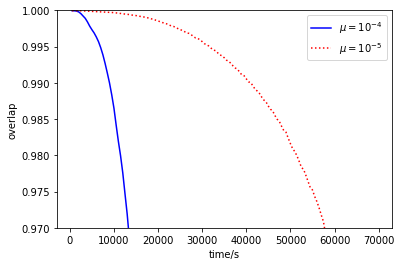

In [132]:
plt.plot(tottimelist,np.array(olplist),'b',label='$\mu = 10^{-4}$')
plt.plot(tottimelist2,np.array(olplist2),'r:',label='$\mu=10^{-5}$')
plt.xlabel('time/s')
plt.ylabel('overlap')
plt.ylim(0.97,1)
plt.legend()
plt.savefig(mydir+'olp_2D_ma_%d.pdf'%time.time())

In [114]:
#算更多的overlap-time:第三条
tottime=40000
massratio=5e-5
THETA=np.pi/4
PHI=0
R_pc=5e9
M=2e5

In [115]:
## KRZ wave

#计算能量etc
#赤道面 非Kerr 轨道
p=6;
ecc=0.5
d1=0.2; d2=0;d3=0;
spin=0.5

rmax = p / (1 - ecc);
rmin = p / (1 + ecc);
r0 = rmax;
th0=np.pi/2.0
invgmax=metric_KRZ_inverse(spin, d1, rmax, th0);
invgmin=metric_KRZ_inverse(spin, d1, rmin, th0);


EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / (invgmax[0][0] - invgmin[0][0]);
Lz = sqrt((invgmax[3][0] - invgmin[3][0]) / (EoverL*EoverL*(invgmin[3][0] * invgmax[0][0] - invgmax[3][0] * invgmin[0][0]) + (invgmin[3][0] * invgmax[3][3] - invgmax[3][0] * invgmin[3][3])));

E = EoverL*Lz;
iota=0;Q=0;
print(E,Lz)
print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;tottime=%f; massratio=%.10e;'%(M,d1,spin,p,ecc,iota,E,Lz,Q,tottime,massratio))
print('R_pc=%.10e; THETA=%.10e; PHI=%.10e;'%(R_pc,THETA,PHI))

0.943852118061 3.04312647962
M=200000.000000; krz_d[1]= 0.200000; spin = 0.500000;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9438521181;Lz=3.0431264796; Q=0.0000000000;tottime=40000.000000; massratio=5.0000000000e-05;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;


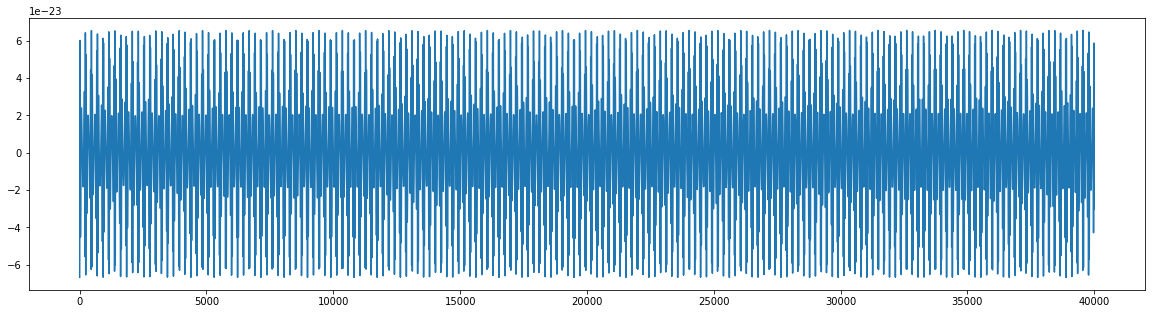

In [116]:
orbfilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)

#reading
t_sec,wave_p,wave_c=np.loadtxt(wavefilename1,unpack=True)
index, myt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename1,unpack=True)

if wave_p[0]==0:
    [t_sec,wave]=getwave(orbfilename1,M=M)
    wave_p=np.real(wave)
    
#plotting KRZ wave
fig=plt.figure()
plt.plot(t_sec,wave_p)
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
#plt.xlim(0,2e3)

In [117]:
## getting Kerr wave

# Corresponding confusion M and a

M_kerr=201020.11500944689
a_kerr=0.61749075872024983

[Ekerr,Lzkerr,Q]=getELQ(ecc,p,iota,a_kerr)
d1=0;d2=0;d3=0;
print('M= %f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(M_kerr,0,a_kerr,p,ecc,iota,Ekerr,Lzkerr,Q))

M= 201020.115009; krz_d[1]= 0.000000; spin = 0.617491;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9437566013;Lz=3.0362859229; Q=0.0000000000;


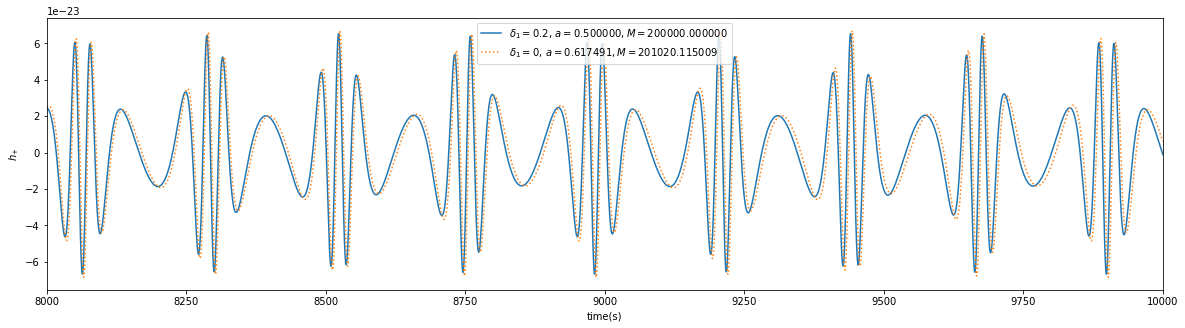

In [118]:
orbfilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
wavefilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q,d1,d2,d3, R_pc, THETA, PHI,massratio)
    
#reading Kerr
t_sec2,wave_p2,wave_c2=np.loadtxt(wavefilename2,unpack=True)
index, myt_sec, tau,t2,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename2,unpack=True)

if wave_p2[0]==0:
    [t_sec2,wave2]=getwave(orbfilename2,M=M_kerr)
    wave_p2=np.real(wave2)
    
#comparing wave
fig=plt.figure()
plt.plot(t_sec,wave_p,label='$\delta_1=0.2,\, a=%f, M=%f$'%(spin,M))
plt.plot(t_sec2,wave_p2,':',label='$\delta_1=0,\, a=%f, M=%f$'%(a_kerr,M_kerr))
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
plt.xlim(8e3,10e3)
plt.xlabel('time(s)')
plt.ylabel('$h_\plus$')
plt.legend()
plt.savefig(mydir+'Evo_2D_ma_%d.pdf'%time.time())

In [119]:
tottimelist3=np.arange(500,tottime,500)
olplist3=[]
for tottime in tottimelist3:
    olplist3.append(overlap([t_sec[np.where(t_sec<tottime)],wave_p[np.where(t_sec<tottime)]+1j*wave_c[np.where(t_sec<tottime)]],
        [t_sec2[np.where(t_sec<tottime)],wave_p2[np.where(t_sec<tottime)]+1j*wave_c2[np.where(t_sec<tottime)]]))

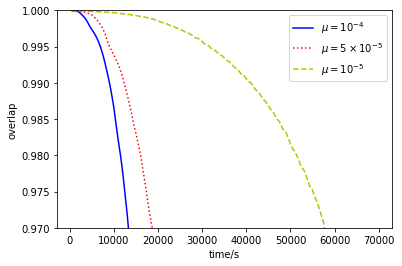

In [133]:
plt.plot(tottimelist,np.array(olplist),'b',label='$\mu = 10^{-4}$')
plt.plot(tottimelist3,np.array(olplist3),'r:',label='$\mu=5\\times10^{-5}$')
plt.plot(tottimelist2,olplist2,'y--',label='$\mu=10^{-5}$')
plt.xlabel('time/s')
plt.ylabel('overlap')
plt.ylim(0.97,1)
plt.legend()
plt.savefig(mydir+'olp_2D_ma_%d.pdf'%time.time())